# 9.1 A Brief matplolib API Primer

- `fig = plt.figure()`
- `axes = fig.add_subplot(11)`


- `fig, axes = plt.subplots(2, 3)`

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
%matplotlib notebook

# sns.set_theme()

In [2]:
import numpy as np

data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


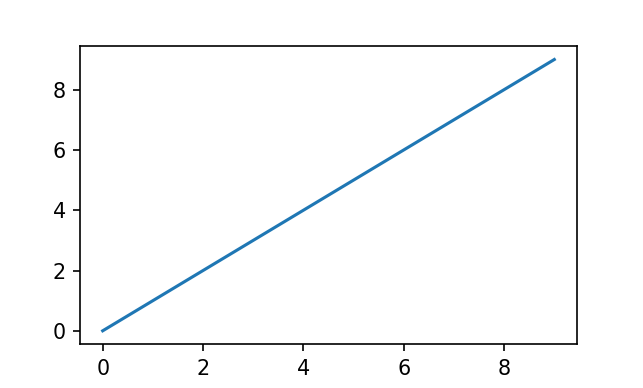

In [3]:
plt.plot(data)

## Figures and Subplots
- Plots reside within a `Figure` object.
- `plt.figsize` gurantee the figure has certain size and aspect ratio.
- `figure` object can `add_subplot(x, y, selected_subplot)`; x.y number of subplots.

    returns `AxesSubplot` object; on which you can directly plot on the other empty subplot by calling each one's instance method.

<IPython.core.display.Javascript object>


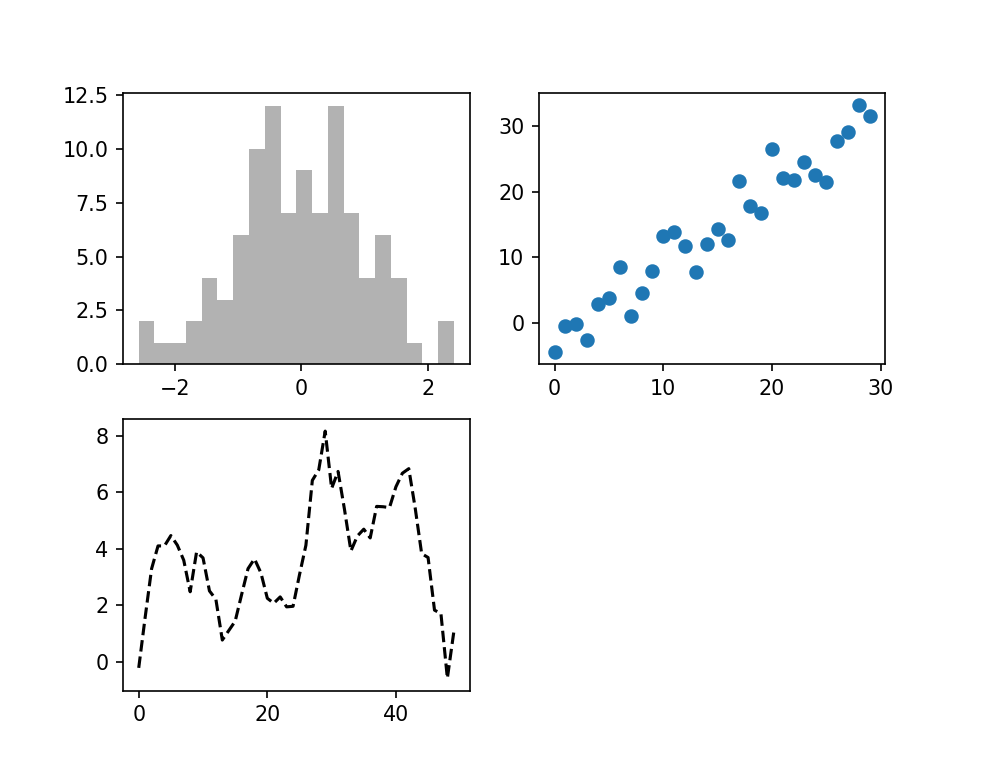

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

# matplotlib draws to the last figure and subplot used. draws on the 3rd subplot.
plt.plot(np.random.randn(50).cumsum(), 'k--')

# Using AxesSubplot object to draw on other subplots.
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

Use `plt.subplots(x, y)` to create a new figure as well as subplots.
 
`axes` is a np.array containing the created subplots objects.

- using `axes[0, 1]` can be indexed and then figure can be drawn. 
- `sharex` and `sharey`: indicate subplots should have the same x- or y-axis, respectively.

    (useful when comparing data on the same scale.)



<IPython.core.display.Javascript object>


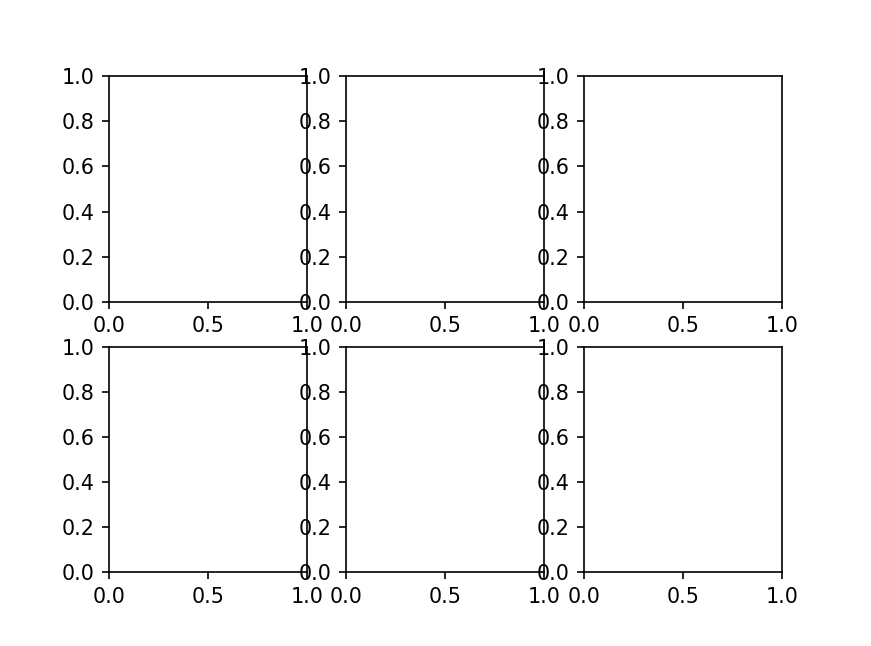

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [5]:
fig, axes = plt.subplots(2, 3)
axes

### Adjusting the spacing around subplots
`subplots_adjust` resize padding and spacing between the subplots. on `Figure` object.

also availaible as a top level function.

`wspace` and `hspace` controls the percent of the figure width and figure heights.

In [6]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, 
               wspace=None, hspace=None)

<IPython.core.display.Javascript object>


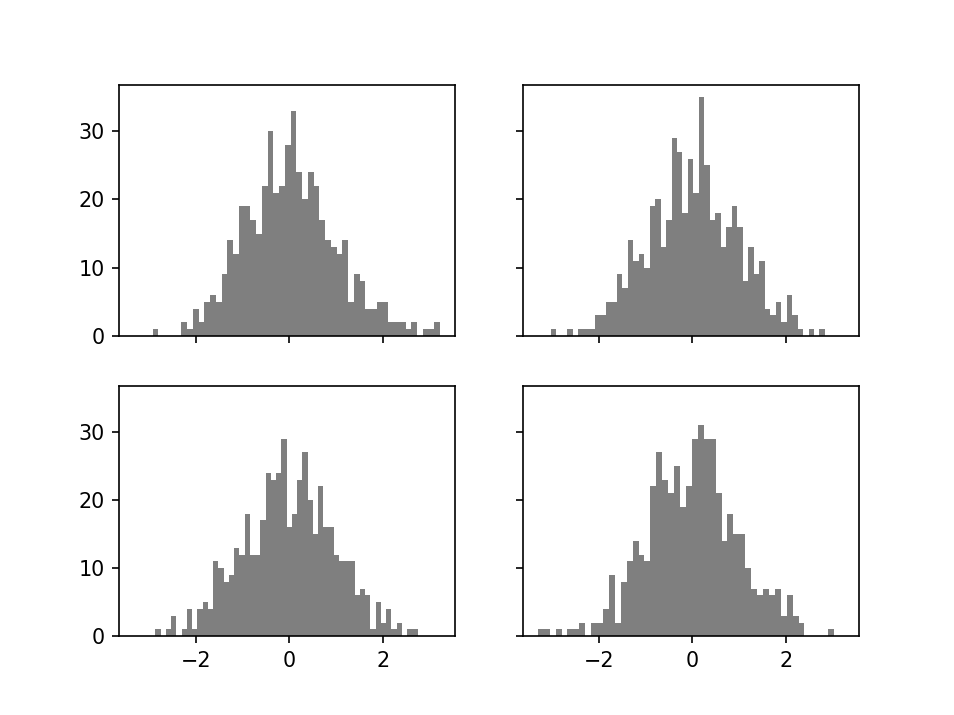

In [7]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=None, hspace=None)

## Colors, Markers, and Line Styles

style string: `'<color><marker_type><line_style>'`

In [8]:
ax1.plot?

<IPython.core.display.Javascript object>


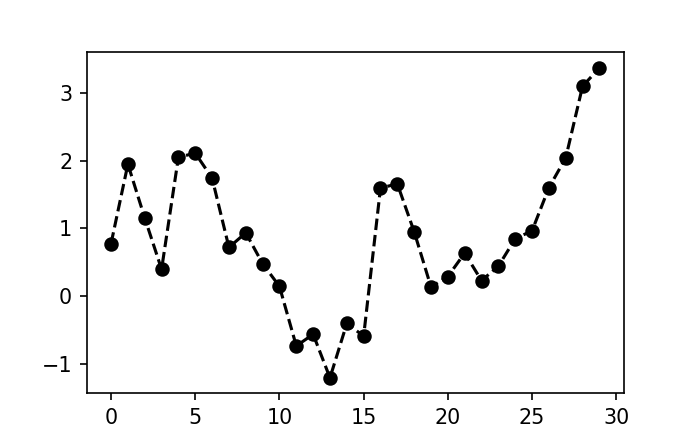

In [9]:
from numpy.random import randn

fig, axes = plt.subplots(1, 1)

axes.plot(randn(30).cumsum(), 'ko--')

<IPython.core.display.Javascript object>


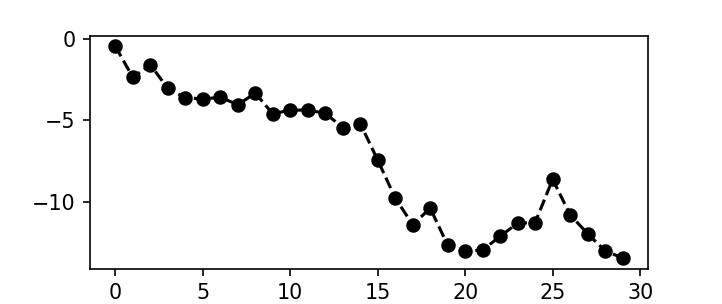

In [10]:
# more explicitly as 
fig = plt.figure()
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

<IPython.core.display.Javascript object>


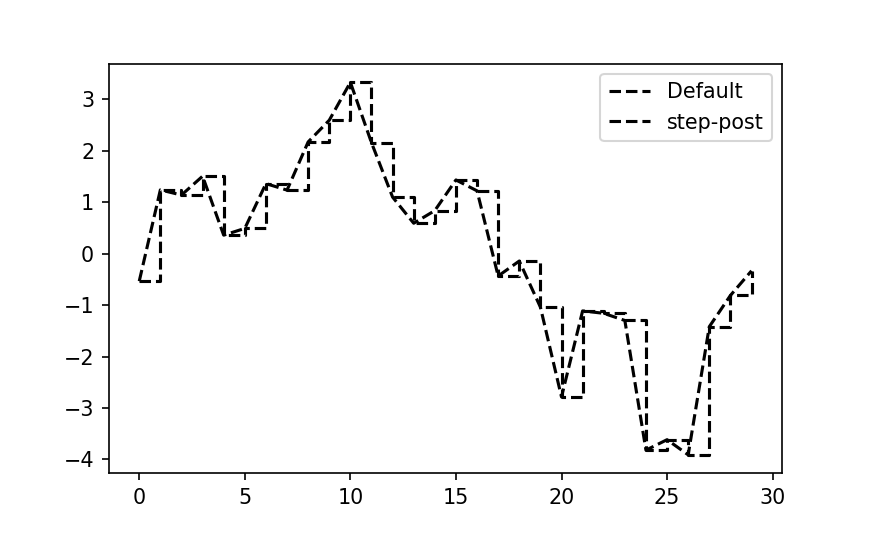

In [11]:
fig = plt.figure()
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k--', drawstyle='steps-post', label='step-post')
plt.legend(loc='best')

## Ticks, Labels, and Legends
The pyplot interface:
1. `plt.xlim`: plot range
   - `plt.xlim()`: returns the current parameter value
   - `plt.xlim([0, 10]`: sets the x-axis range
   - `ax.get_xlim()`
   - `ax.set_xlim()`
    
    
2. `plt.xticks`: tick locations
    - `ax.set_xticks`: where to place the ticks along the data range. By Default these locations will also be the labels.
   
    
3. `plt.xticklabels`: tick labels
    - `ax.set_xticklabels`
    
    
4. `ax.set_xlablel()`: name of x-axis


5. `ax.set_title()`: subplot title. 
    
### Setting the title, axis labels, ticks, and ticklabels

<IPython.core.display.Javascript object>


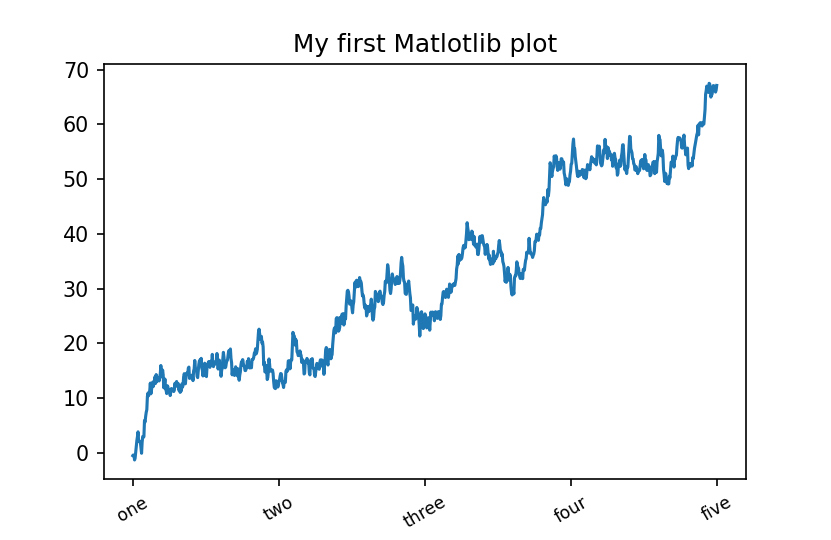

[Text(0.5, 1.0, 'My first Matlotlib plot'), Text(0.5, 0, 'Stages')]

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_xlabel('Stages')
ax.set_title('My first Matplotlib plot')

# The axes class has a set method that allows batch setting of plot properties.
props = {
    'title': 'My first Matlotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

### Adding Legends

<IPython.core.display.Javascript object>


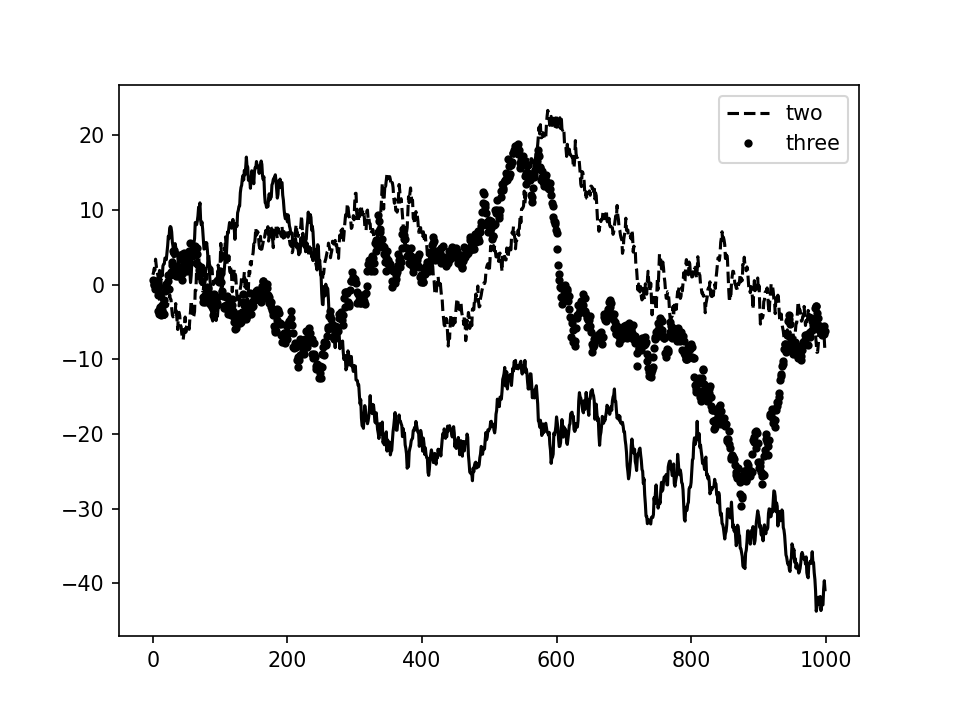

In [18]:
from numpy.random import randn

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(randn(1000).cumsum(), 'k')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best') # plt.legend() also works

In [17]:
ax.legend?

### Annotations and Drawing on a Subplot
`text`, `arrow` and `annotate`.
- `text` draws text at given coordinated (x, y) with custom styling.

<IPython.core.display.Javascript object>


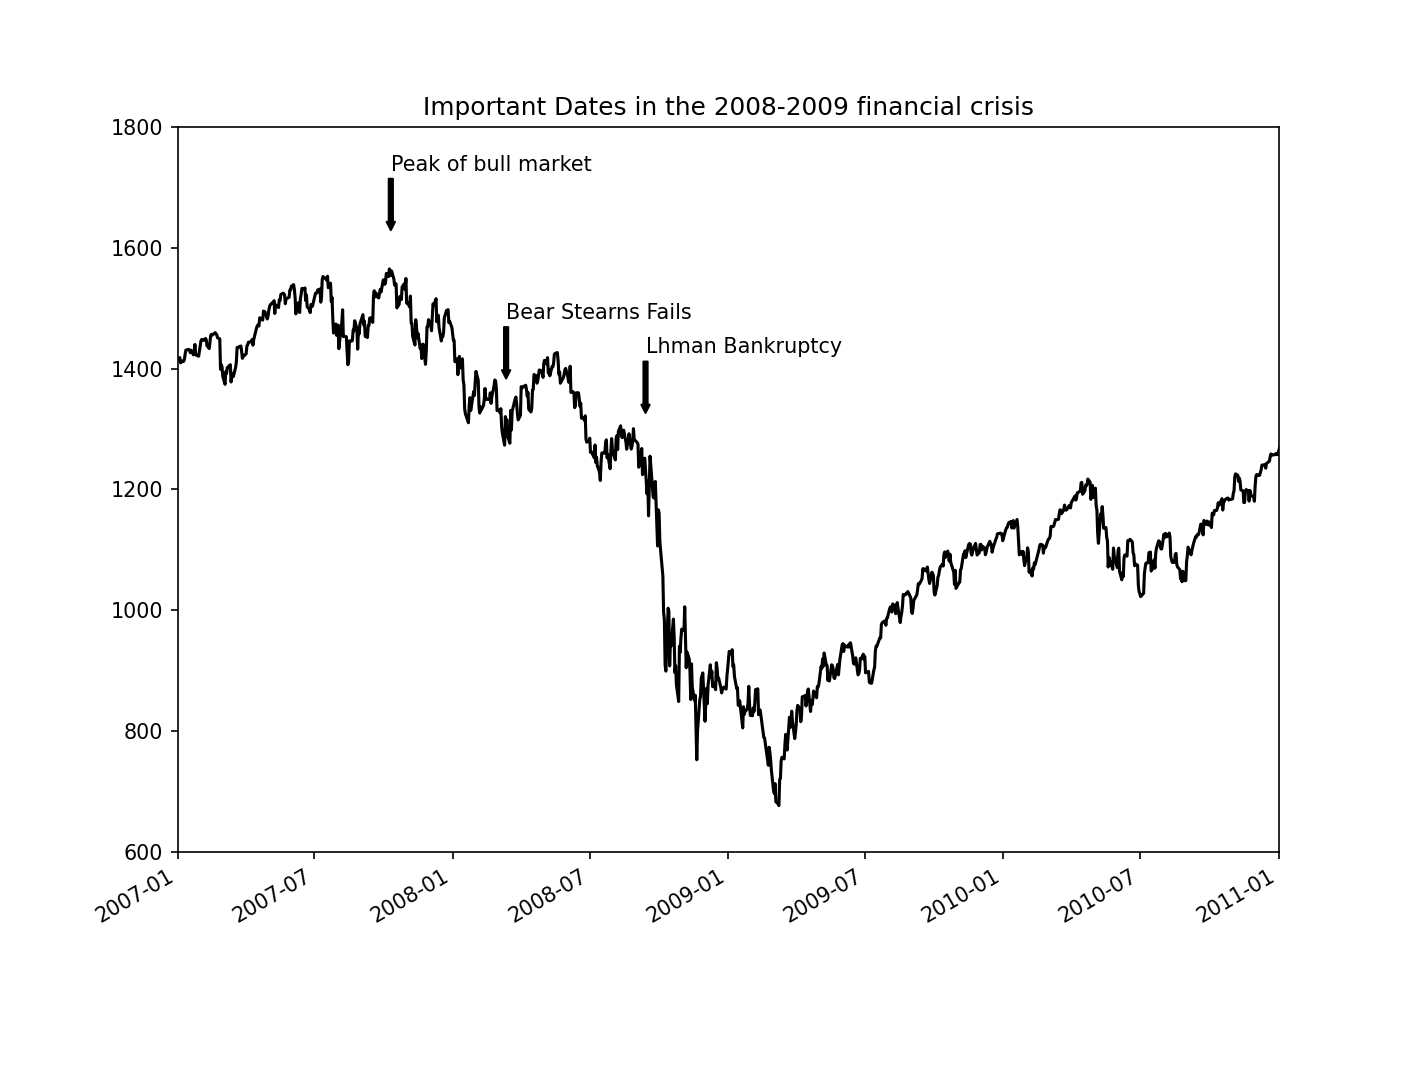

Text(0.5, 1.0, 'Important Dates in the 2008-2009 financial crisis')

In [36]:
#ax.text(0.2, 0.10, 'Hello World!', family='JetBrains Mono', fontsize=10)

from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(111)

data = pd.read_csv('datasets/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')    # ax=ax is unnecessary.

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 13), 'Lhman Bankruptcy')
]


# xy: tuple of xy coordinates for arrow.
# xytext : tuple of xy coordinates for text
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75), 
                xytext=(date, spx.asof(date)+200),   
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom  in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important Dates in the 2008-2009 financial crisis')

Matplotlib has object that represent many common shapes located in `matplotlib.patches`.

Some of them like `Rectangle` and `Circle` are found in `matplotlib.pyplot`.

1. Create a patch object `shp`
2. `ax.add_subplot(shp)`

<IPython.core.display.Javascript object>


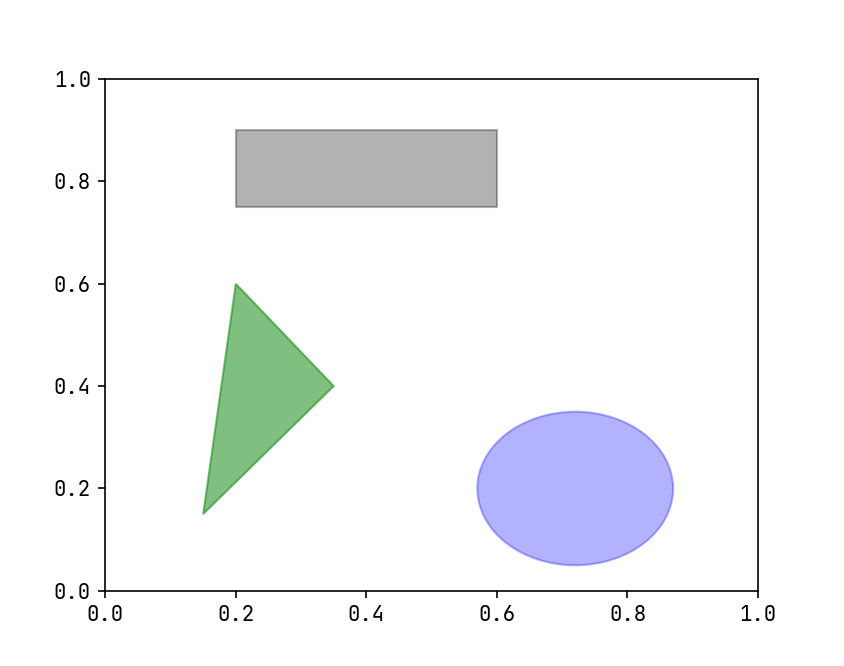

In [87]:
fig = plt.figure(figsize=(3.8, 3))
ax = fig.add_subplot(111)

# rect = plt.Rectangle((x, y), length, height,[...])
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.72, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## Savng Plots to File

In [45]:
plt.savefig('testfig/figpath.pdf')

In [46]:
# To get the same plot as a PNG with minimal whitespace around the plot and at 400 DPI
plt.savefig('testfig/figpath.png', dpi=400, bbox_inches='tight')

In [47]:
plt.savefig?

In [48]:
# Can also write to any file-like object, such as ByteIO

from io import BytesIO

buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

## matplotlib Configuration
`plt.rc(<component>, <sequence of keyword arguments>)`

Use `dict` as the keyword argument.

In [115]:
# Set the global default figure size to be 10x10
plt.rc('figure', figsize=(3.5, 1.5))

font_options = {'family': 'JetBrains Mono',
                'weight': 'normal',
                'size': 10}
plt.rc('font', **font_options)

In [116]:
plt.rc?

# Plotting with pandas and Seaborn

## Line Plots
- The series object's index is passed to matplotlib for plotting on the x-axis. Though you can disable it by passing *`use_index`*`=False`
- Most of the pandas plotting functons accept `ax` parameter, which can be matplotlib Subplot object.

<IPython.core.display.Javascript object>


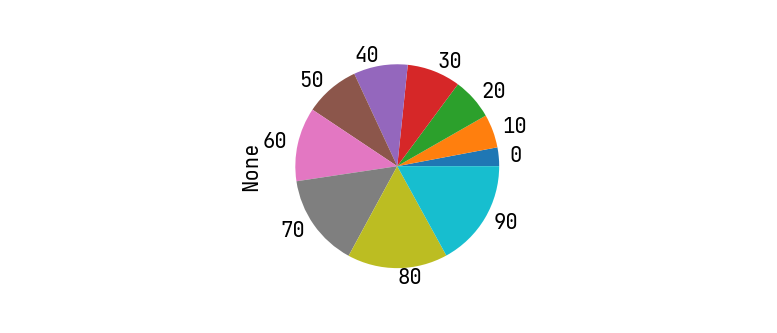

<AxesSubplot:ylabel='None'>

In [125]:
fig = plt.figure(figsize=(3.5, 1.5))
s = pd.Series(np.random.rand(10).cumsum(), index=np.arange(0, 100, 10))
s.plot(use_index=False, rot=0, kind='pie')

In [119]:
s

0     0.174442
10    0.934070
20    1.396771
30    1.971494
40    2.407279
50    2.623267
60    3.071757
70    3.989981
80    4.652205
90    5.414817
dtype: float64

### df.plot() is same as df.plot.line()

<IPython.core.display.Javascript object>


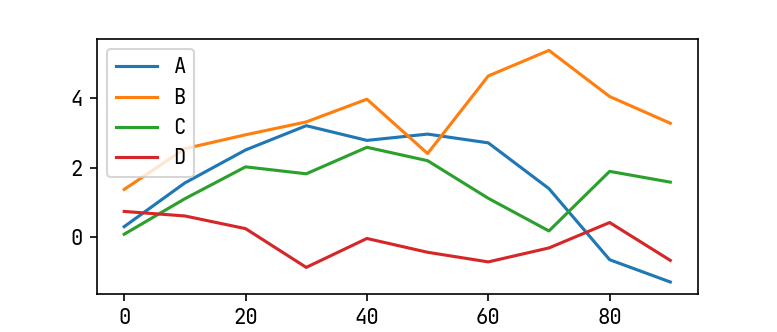

<AxesSubplot:>

In [123]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10),)
df.plot()

## Bar Plots

<IPython.core.display.Javascript object>


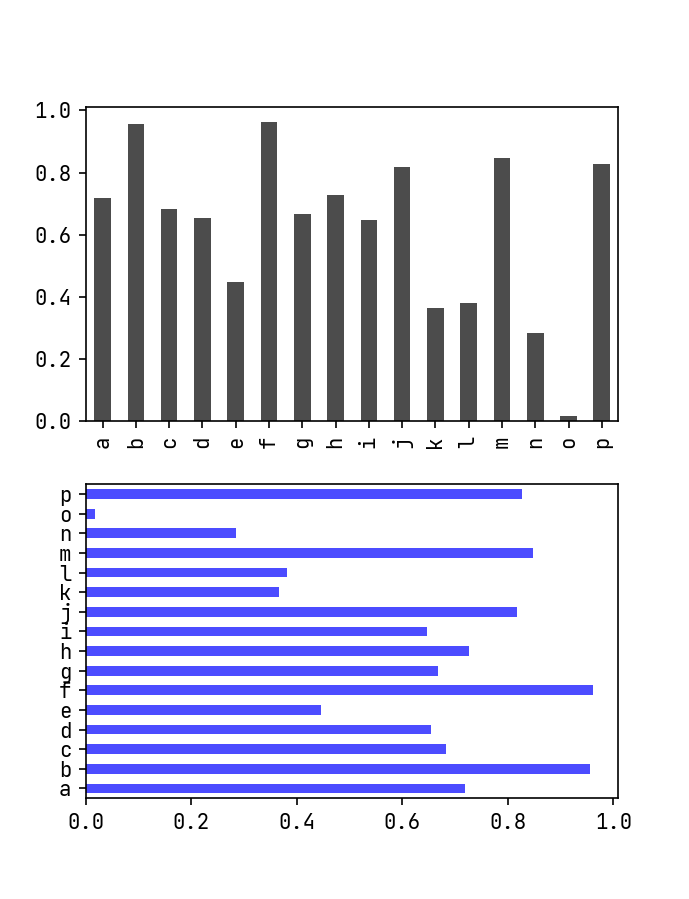

<AxesSubplot:>

In [136]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='b', alpha=0.7)

#### With df, bar plots group the values in eah row together in a group of bars, side by side, for each value.

In [140]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(list('ABCD'), name='Genus'))
df

Genus,A,B,C,D
one,0.329864,0.838022,0.726956,0.938266
two,0.702612,0.472558,0.200782,0.253524
three,0.118688,0.983241,0.443555,0.906926
four,0.105495,0.018662,0.048436,0.523625
five,0.599759,0.933811,0.232823,0.443092
six,0.688008,0.848179,0.318423,0.327754


<IPython.core.display.Javascript object>


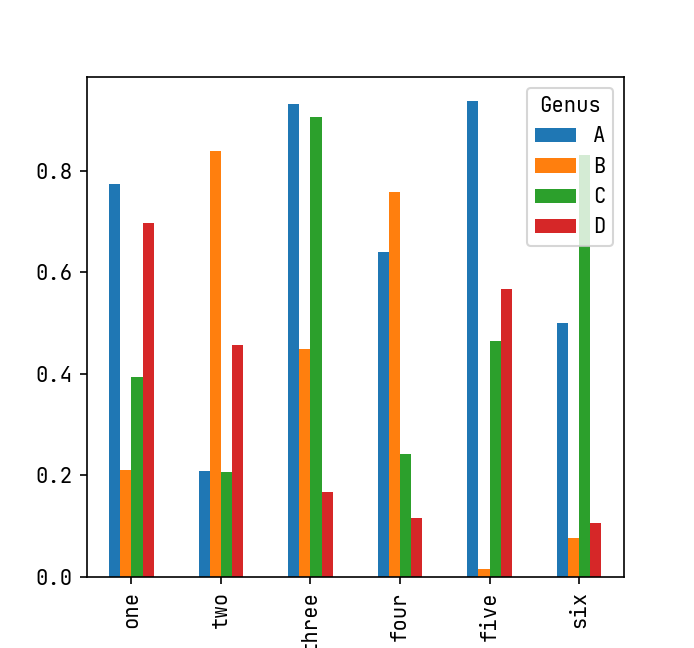

<AxesSubplot:>

In [138]:
df.plot.bar()

<IPython.core.display.Javascript object>


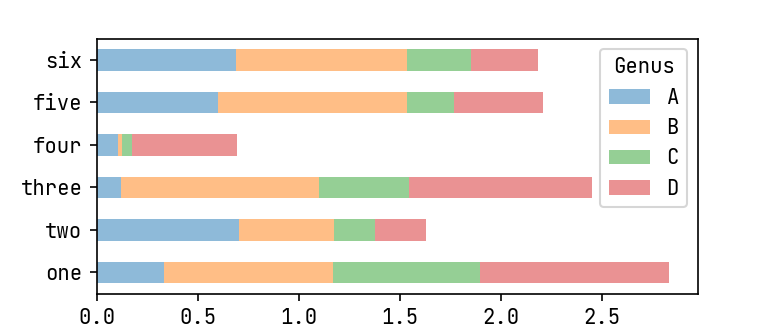

<AxesSubplot:>

In [145]:
df.plot.barh(stacked=True, alpha=0.5)

<IPython.core.display.Javascript object>


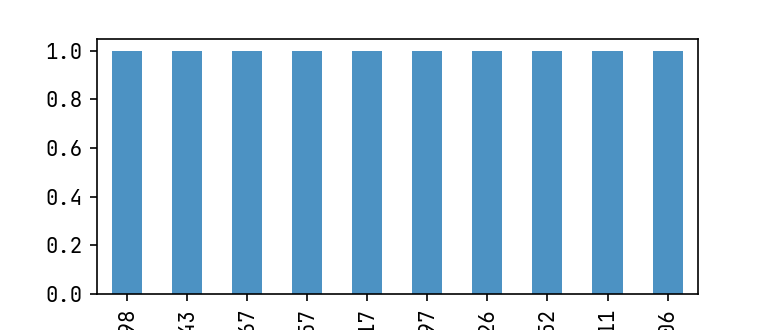

<AxesSubplot:>

In [148]:
fig = plt.figure(figsize=(3.5, 1.5))
s.value_counts().plot.bar(alpha=0.8)

In [151]:
tips = pd.read_csv('datasets/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])

# Not many 1- and 6-person size parties
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [159]:
# Normalize so that each row sums to 1 and make the plot
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


<IPython.core.display.Javascript object>


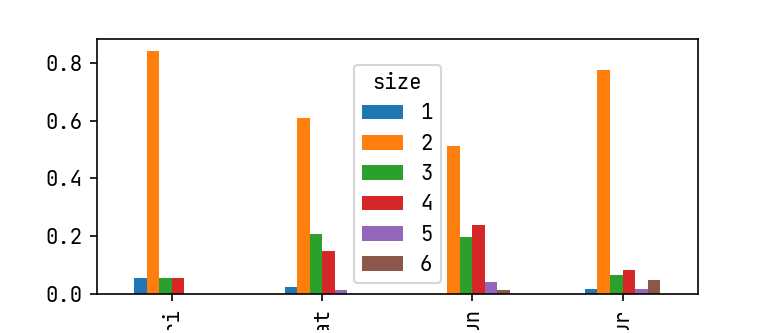

<AxesSubplot:xlabel='day'>

In [163]:
party_pcts.plot.bar()

In [161]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


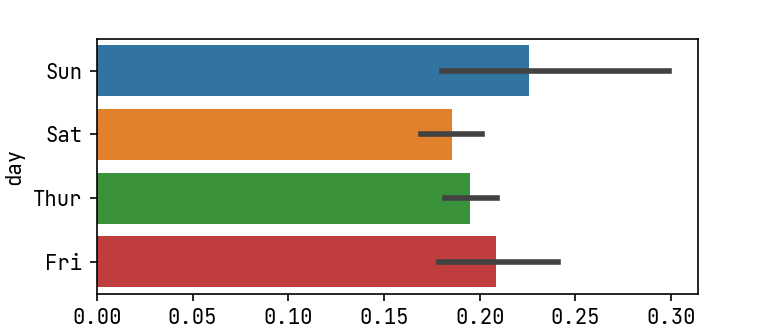

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [168]:
# The bars represent 95% confidence interval

fig, axes = plt.subplots(1, 1)
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<IPython.core.display.Javascript object>


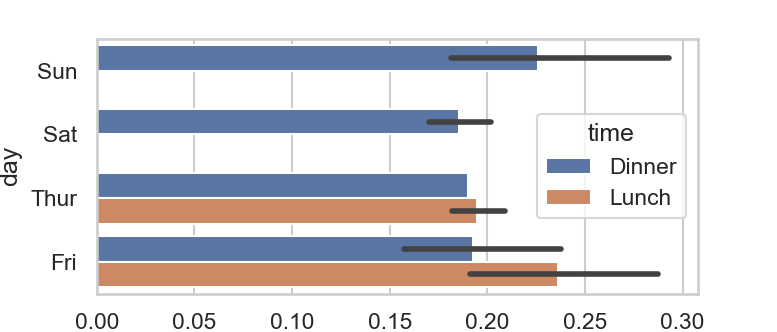

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [174]:
# 'hue' option enables us to split by an additional categorical value
fig, axes = plt.subplots(1, 1)
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [171]:
sns.set(style='whitegrid')

## Histogram and Density Plots

<IPython.core.display.Javascript object>


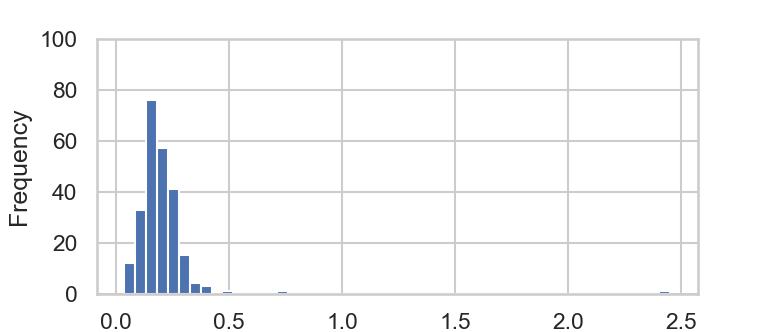

(0.0, 100.0)

In [179]:
fig, axes = plt.subplots(1, 1)
tips['tip_pct'].plot.hist(bins=50)
plt.ylim([0, 100])

<IPython.core.display.Javascript object>


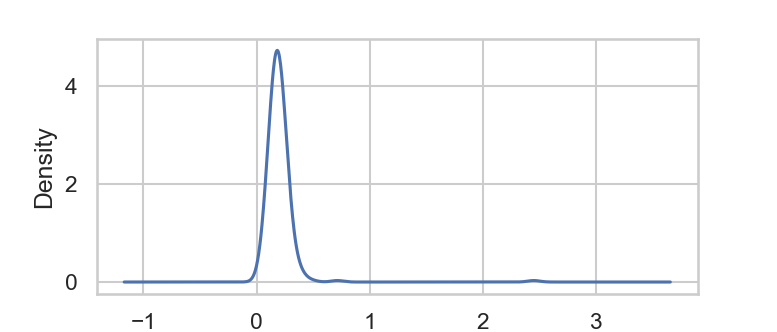

<AxesSubplot:ylabel='Density'>

In [180]:
fig = plt.figure()
tips['tip_pct'].plot.density()

### `seaborn.distplot`
#### Plot both a histogram and a continuous density estimate

<IPython.core.display.Javascript object>


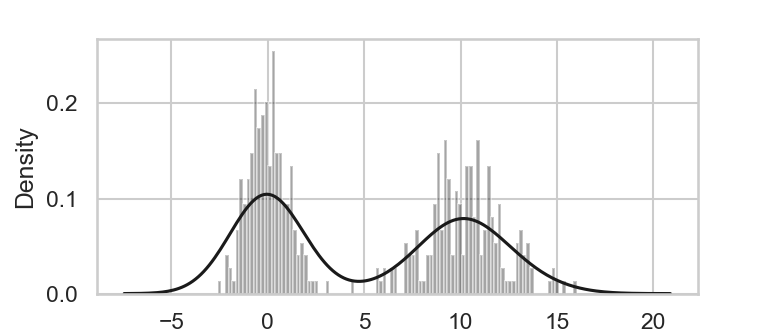

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

In [190]:
# Bimodal distribution consisting of draws from two different standard normal distribution
fig = plt.figure()
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins=100, color='k')

## Scatter or Point Plots
#### Useful way of examining the relationship between two one-dimensional data series.

In [188]:
macro = pd.read_csv('datasets/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


### `seaborn.regplot`
#### makes a scatter plot and fits a linear regression line.

<IPython.core.display.Javascript object>


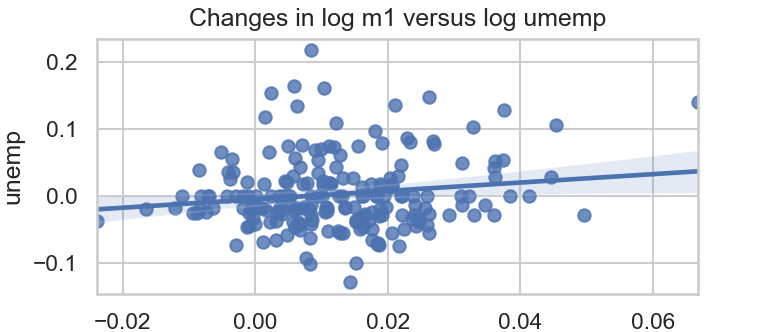

Text(0.5, 1.0, 'Changes in log m1 versus log umemp')

In [197]:
fig = plt.figure()
sns.regplot(x='m1',y= 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s'%('m1', 'umemp'))

### `seaborn.pairplot`
#### Supports placing histogram or density estimates of each variable along the diagonal.
*pair plot* or *scatter plot matrix*: scatter plots among a group of varaibles.


<IPython.core.display.Javascript object>


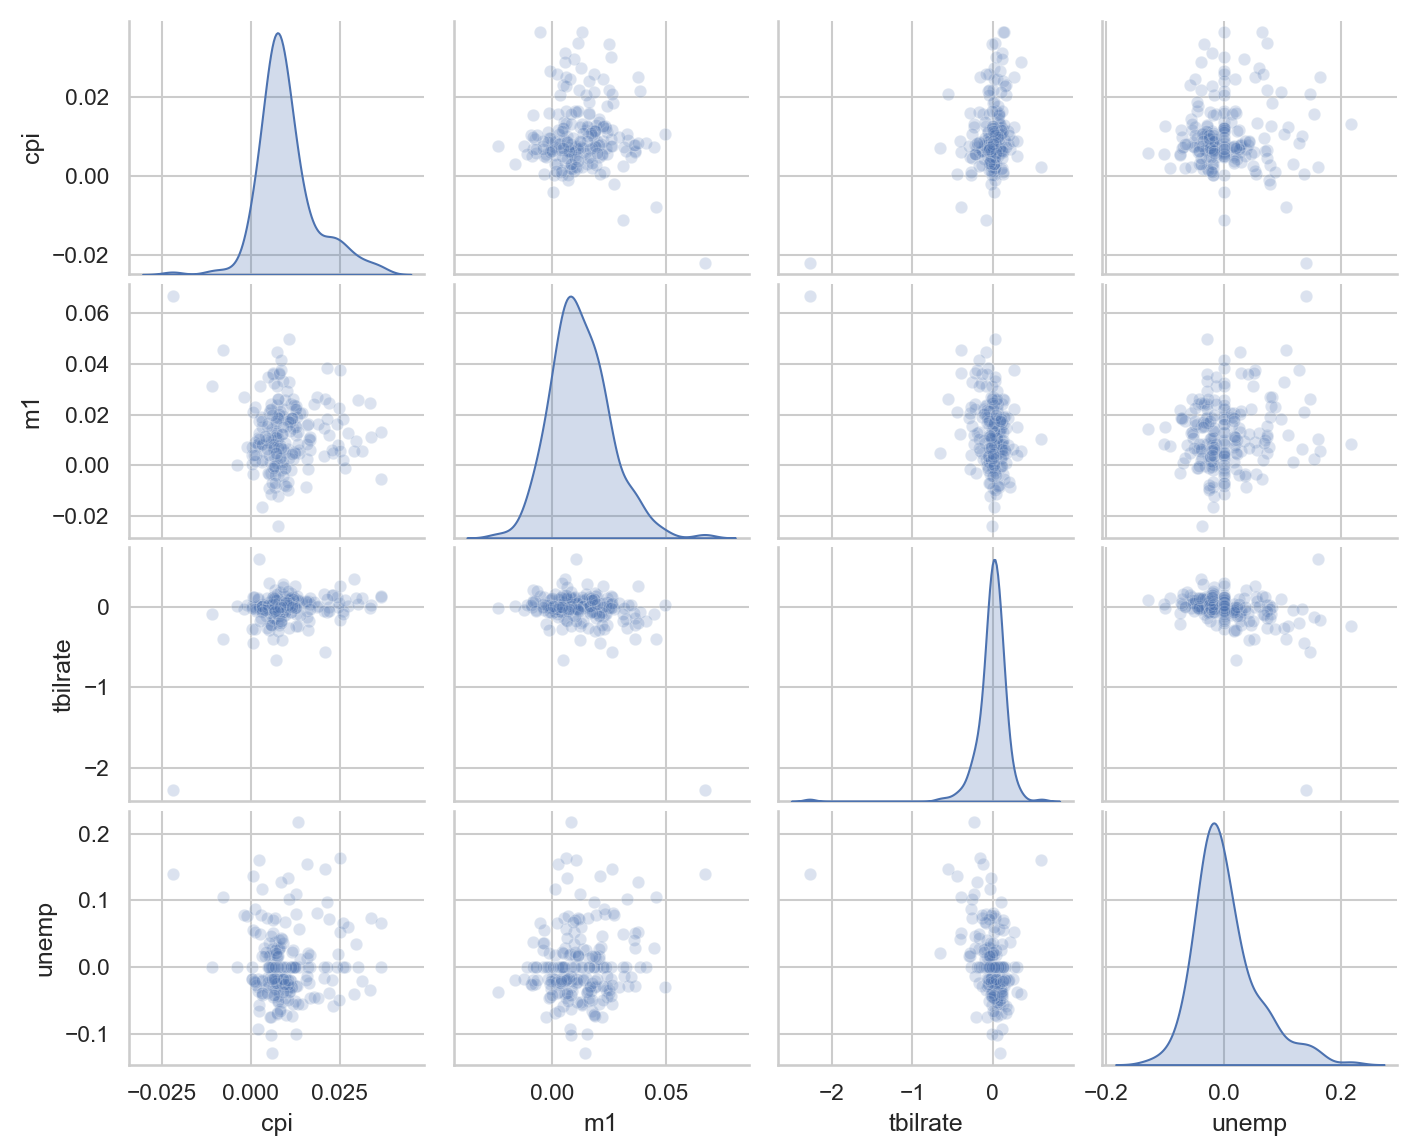

In [203]:
# plot_kws: 
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

## Facet Grids and Categorical Data
### `seaborn.catplot`
#### Helps to visualize data with many categorical variables

<IPython.core.display.Javascript object>


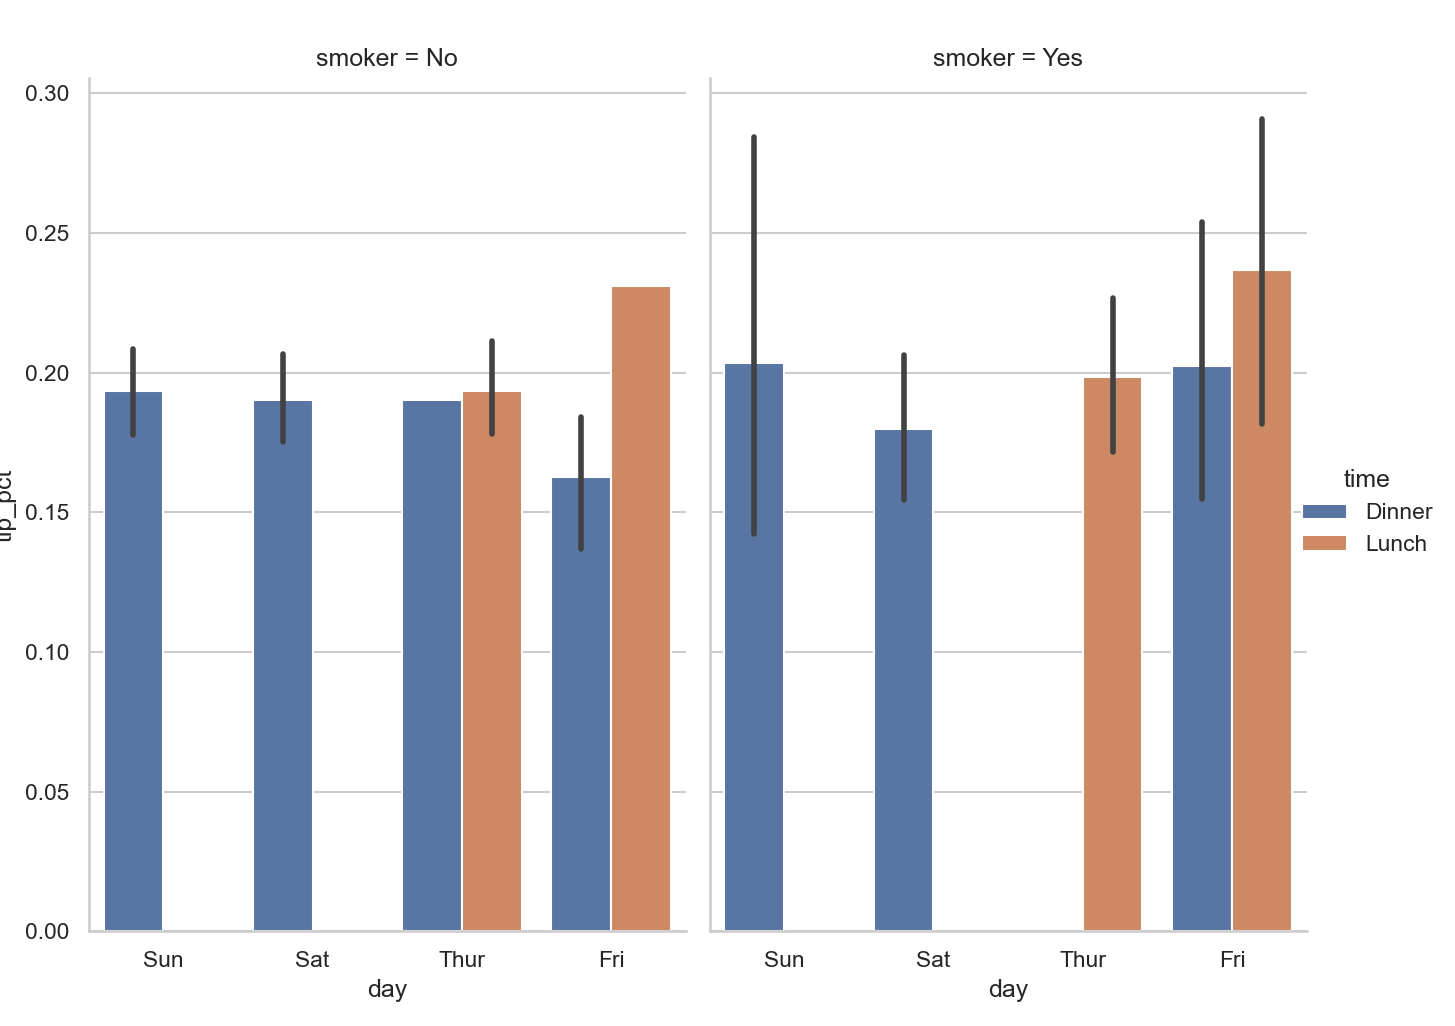

In [213]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


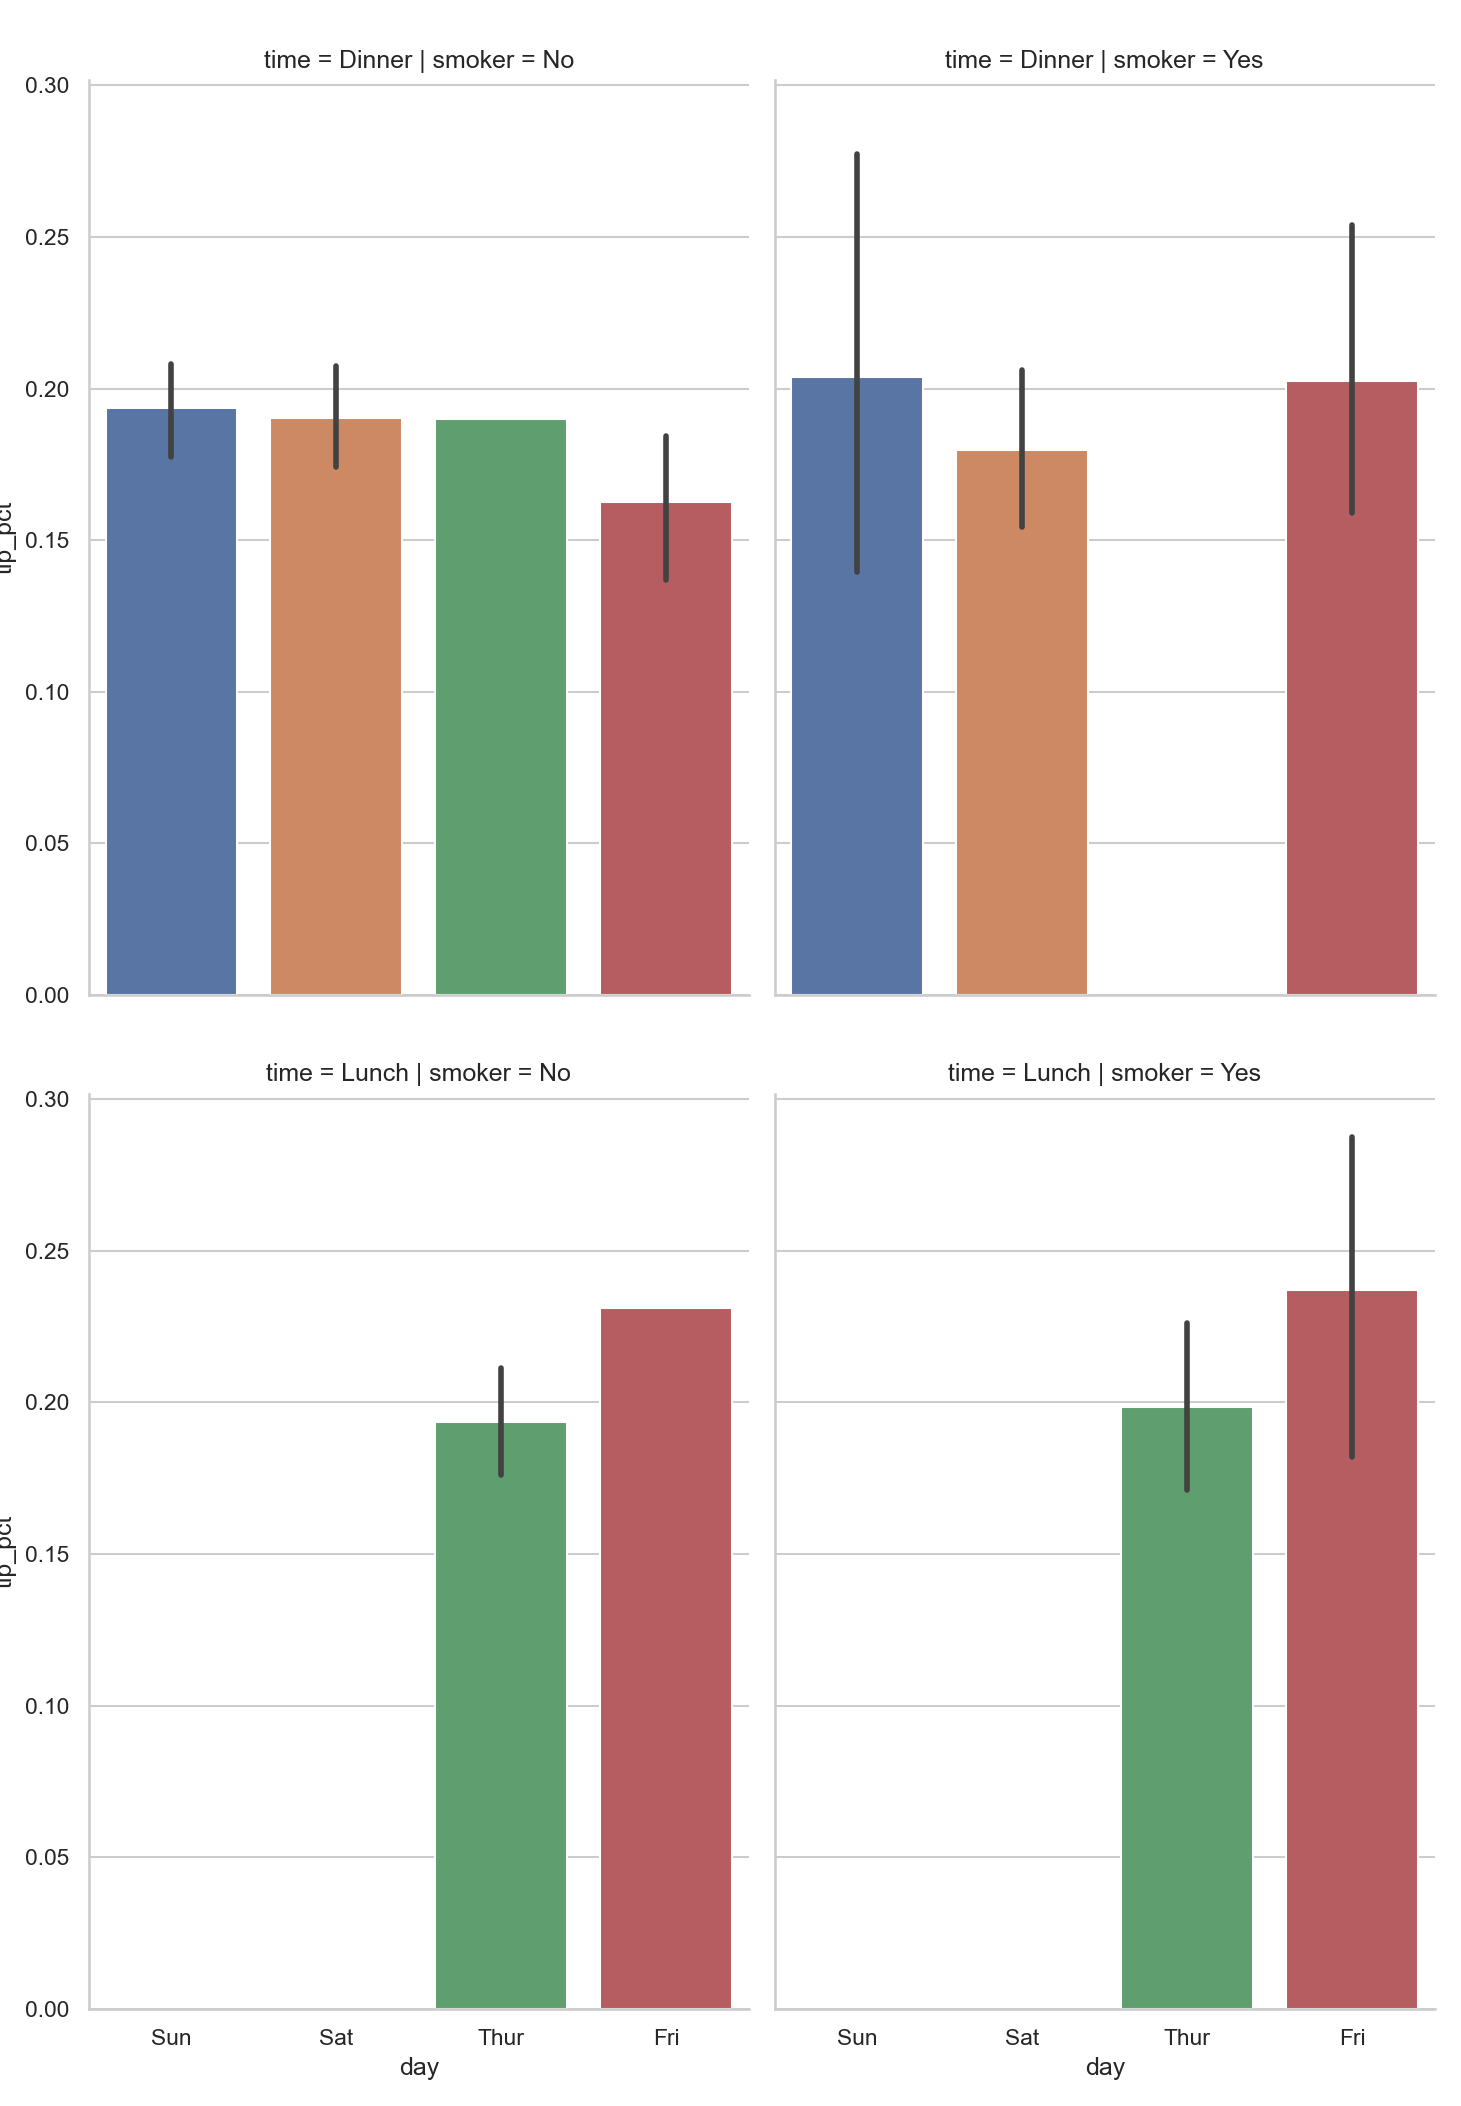

In [216]:
# Instead of grouping by 'time' by different bar colors within a facet
# we can also expand the facet grid by adding one row per time value.
sns.catplot(x='day', y='tip_pct', row='time',
            col='smoker', 
            kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


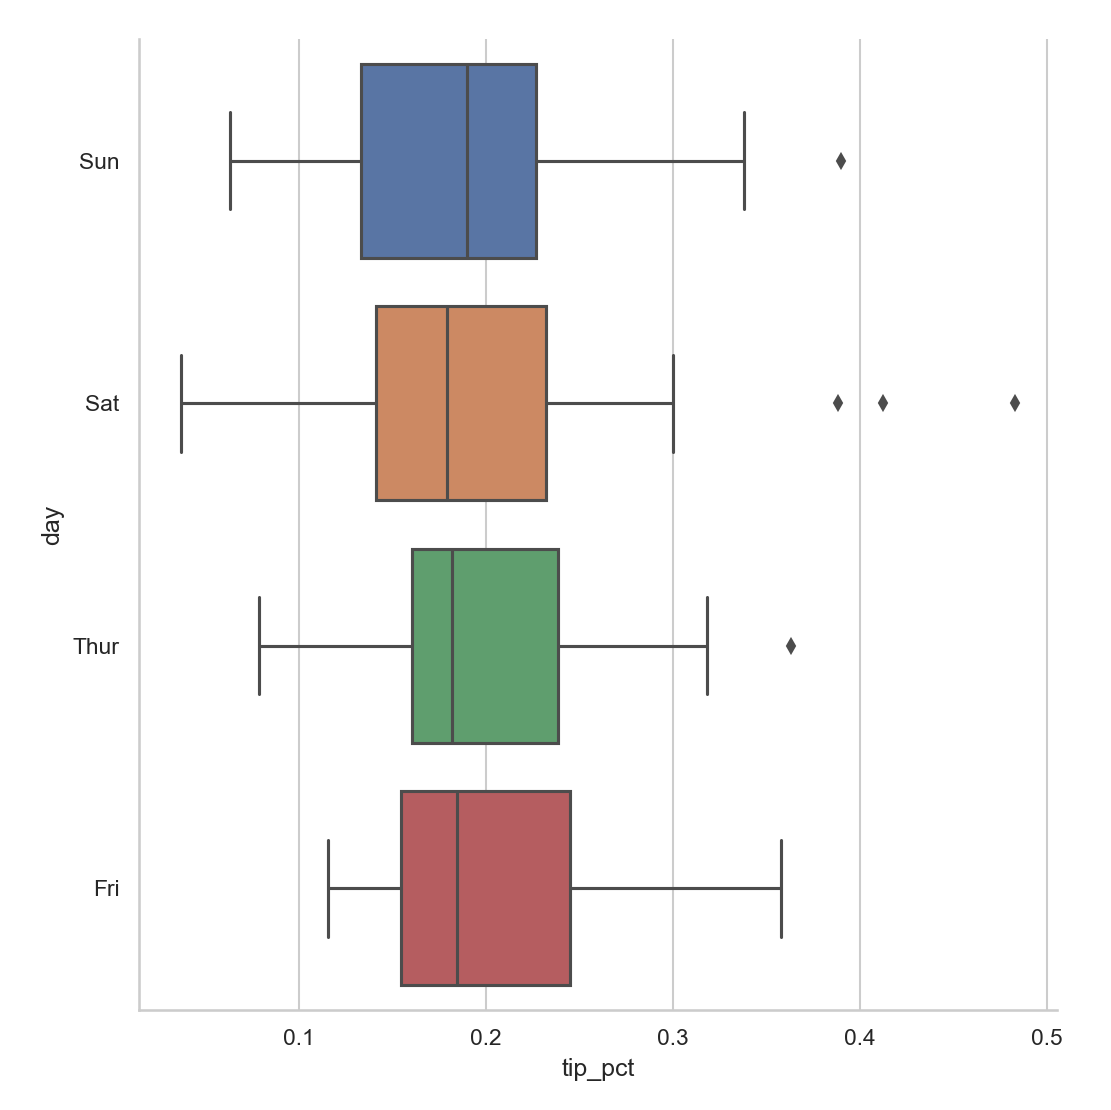

In [218]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])